In [3]:
from google.colab import files
uploaded = files.upload()

# Dynamically get the uploaded Kaggle JSON filename
import os
json_file = next((f for f in uploaded if f.endswith('.json')), None)
if json_file:
    os.rename(json_file, "kaggle.json")

# Setup Kaggle API credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Install Kaggle CLI
!pip install -q kaggle

# Download the dataset from Kaggle
!kaggle datasets download -d uom190346a/sleep-health-and-lifestyle-dataset

# Unzip the dataset
import zipfile
zip_path = "sleep-health-and-lifestyle-dataset.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(".")

# Load the CSV
import pandas as pd
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()


Saving kaggle (1).json to kaggle (1) (2).json
Dataset URL: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
License(s): CC0-1.0
  0% 0.00/2.54k [00:00<?, ?B/s]
100% 2.54k/2.54k [00:00<00:00, 6.22MB/s]


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
# Select numeric columns for summary
numeric_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                'Stress Level', 'Heart Rate', 'Daily Steps']

# Create a summary table
eda_summary = pd.DataFrame({
    'Mean': df[numeric_cols].mean(),
    'Median': df[numeric_cols].median(),
    'Std Dev': df[numeric_cols].std()
})

# Round for readability
eda_summary = eda_summary.round(2)

# Display summary table
print(" Summary of Continuous Variables:")
display(eda_summary)


📊 Summary of Continuous Variables:


,Mean,Median,Std Dev
Age,42.18,43.0,8.67
Sleep Duration,7.13,7.2,0.80
Quality of Sleep,7.31,7.0,1.20
Physical Activity Level,59.17,60.0,20.83
Stress Level,5.39,5.0,1.77
Heart Rate,70.17,70.0,4.14
Daily Steps,6816.84,7000.0,1617.92


### Interpretation of Summary Statistics

The dataset represents a relatively healthy and active population based on the following observations:

Age:  
The average participant age is approximately 42 years, with a moderate spread (standard deviation of 8.67), indicating a middle-aged cohort with balanced representation.

Sleep Duration:  
The mean sleep duration is 7.13 hours per night, closely aligned with recommended sleep guidelines for adults. The low standard deviation (0.80) suggests that most participants report similar sleep durations.

Quality of Sleep:  
Self-reported sleep quality averages around 7.31 out of 10, which indicates generally positive sleep experiences. However, some variability (standard deviation of 1.20) suggests a range of sleep satisfaction across individuals.

Physical Activity Level:  
The average participant engages in approximately 59 minutes of physical activity per week. This is slightly below the WHO-recommended 150 minutes per week, highlighting a potential area of concern in health behavior.

Stress Level:  
The mean stress score is 5.39 on a 10-point scale. With a standard deviation of 1.77, it reflects varied stress experiences, potentially useful for correlation with sleep and health metrics.

Heart Rate:  
The average heart rate is 70.17 beats per minute, falling within the normal adult resting range (60–100 bpm). The relatively low variability (standard deviation of 4.14) suggests consistent cardiovascular conditions across the sample.

Daily Steps:  
Participants take an average of 6,817 steps per day, slightly under the commonly cited benchmark of 10,000 steps. This may suggest moderately active lifestyles, and invites further analysis regarding associations with sleep, BMI, or health conditions.

These descriptive statistics form a foundational understanding of the dataset, offering insight into general health trends while also highlighting variables such as stress, physical activity, and daily steps that may merit deeper exploration through hypothesis testing and correlation analysis.


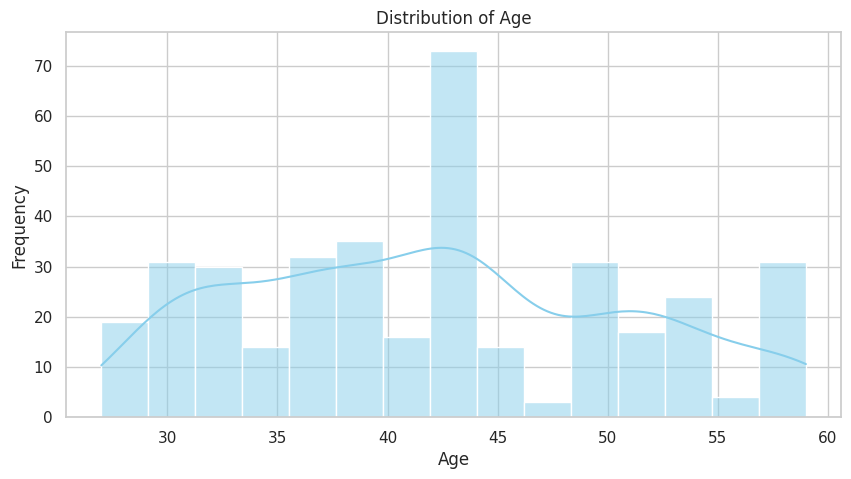

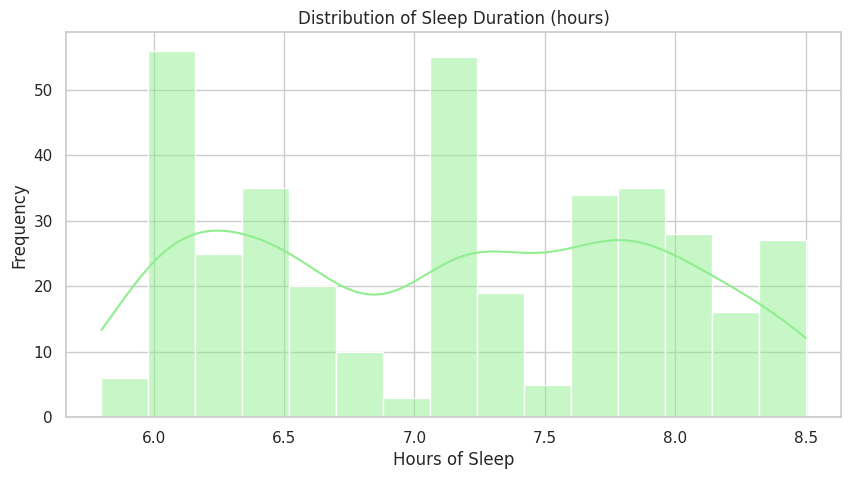

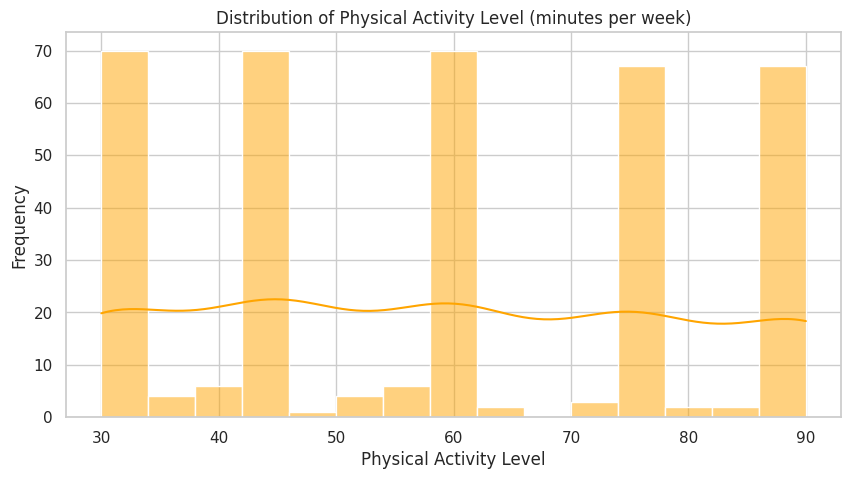

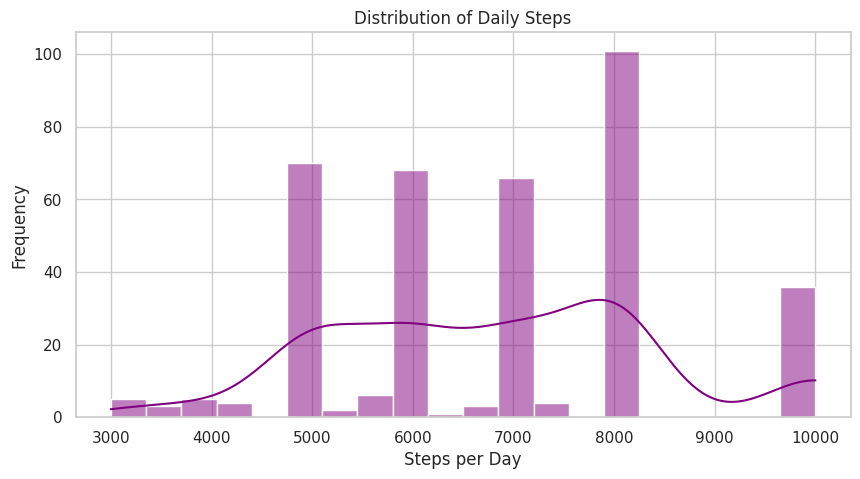

<ipython-input-5-4af3c2058463>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BMI Category', y='Sleep Duration', data=df, palette='pastel')


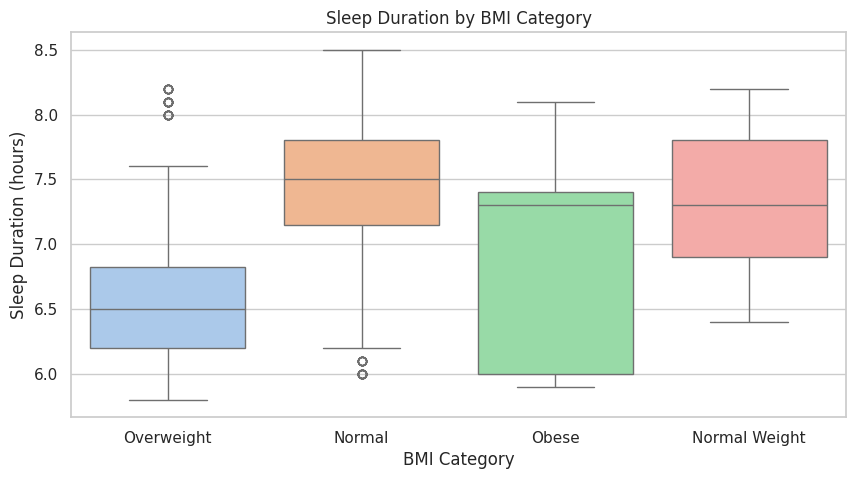

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Histogram: Age
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Histogram: Sleep Duration
sns.histplot(df['Sleep Duration'], bins=15, kde=True, color='lightgreen')
plt.title("Distribution of Sleep Duration (hours)")
plt.xlabel("Hours of Sleep")
plt.ylabel("Frequency")
plt.show()

# Histogram: Physical Activity Level
sns.histplot(df['Physical Activity Level'], bins=15, kde=True, color='orange')
plt.title("Distribution of Physical Activity Level (minutes per week)")
plt.xlabel("Physical Activity Level")
plt.ylabel("Frequency")
plt.show()

# Histogram: Daily Steps
sns.histplot(df['Daily Steps'], bins=20, kde=True, color='purple')
plt.title("Distribution of Daily Steps")
plt.xlabel("Steps per Day")
plt.ylabel("Frequency")
plt.show()

# Boxplot: Sleep Duration by BMI Category
sns.boxplot(x='BMI Category', y='Sleep Duration', data=df, palette='pastel')
plt.title("Sleep Duration by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Sleep Duration (hours)")
plt.show()


In [6]:
import scipy.stats as stats

# Clean up the Sleep Disorder column (fill missing with 'None')
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

# Split groups
sleep_disorder_group = df[df['Sleep Disorder'] != 'None']['Sleep Duration']
no_sleep_disorder_group = df[df['Sleep Disorder'] == 'None']['Sleep Duration']

# Perform Independent T-Test
t_stat, p_val = stats.ttest_ind(no_sleep_disorder_group, sleep_disorder_group, equal_var=False)

print("Hypothesis 1: Sleep Duration and Sleep Disorder")
print(f"Mean (No Disorder): {no_sleep_disorder_group.mean():.2f} hrs")
print(f"Mean (Disorder): {sleep_disorder_group.mean():.2f} hrs")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.4f}")

# Interpret the result
alpha = 0.05
if p_val < alpha:
    print("Result: Reject the null hypothesis — people with sleep disorders sleep significantly less.")
else:
    print("Result: Fail to reject the null hypothesis — no significant difference found.")


Hypothesis 1: Sleep Duration and Sleep Disorder
Mean (No Disorder): 7.36 hrs
Mean (Disorder): 6.81 hrs
T-statistic: 6.876
P-value: 0.0000
Result: Reject the null hypothesis — people with sleep disorders sleep significantly less.


### Hypothesis 1: Sleep Duration and Sleep Disorder

Research Question  
Does having a sleep disorder significantly affect how long a person sleeps?

Null Hypothesis (H₀)  
There is no difference in the average sleep duration between individuals with and without a diagnosed sleep disorder.

Alternative Hypothesis (H₁)  
Individuals with a sleep disorder have a significantly lower average sleep duration compared to those without a disorder.

Method  
We conducted an independent two-sample t-test to compare the sleep duration of two groups:  
- Individuals without a sleep disorder  
- Individuals diagnosed with a sleep disorder  

This test used a significance level of α = 0.05 and assumed unequal variances.

Results  
Mean Sleep Duration (No Disorder): 7.36 hours  
Mean Sleep Duration (With Disorder): 6.81 hours  
T-statistic: 6.876  
P-value: 0.0000

Conclusion  
Since the p-value is significantly below 0.05, we reject the null hypothesis.  
There is strong statistical evidence that individuals with a sleep disorder sleep significantly less than those without one.


In [7]:
import numpy as np
import scipy.stats as stats

# Define a cutoff for high vs low physical activity (e.g., median)
activity_cutoff = df['Physical Activity Level'].median()

# Create groups
high_activity = df[df['Physical Activity Level'] > activity_cutoff]['Stress Level']
low_activity = df[df['Physical Activity Level'] <= activity_cutoff]['Stress Level']

# T-test
t_stat2, p_val2 = stats.ttest_ind(low_activity, high_activity, equal_var=False)

print("Hypothesis 2: Stress Level and Physical Activity")
print(f"Mean Stress (Low Activity): {low_activity.mean():.2f}")
print(f"Mean Stress (High Activity): {high_activity.mean():.2f}")
print(f"T-statistic: {t_stat2:.3f}")
print(f"P-value: {p_val2:.4f}")

alpha = 0.05
if p_val2 < alpha:
    print("Result: Reject the null hypothesis — higher physical activity is linked to lower stress.")
else:
    print("Result: Fail to reject the null hypothesis — no significant difference found.")


Hypothesis 2: Stress Level and Physical Activity
Mean Stress (Low Activity): 5.41
Mean Stress (High Activity): 5.34
T-statistic: 0.361
P-value: 0.7181
Result: Fail to reject the null hypothesis — no significant difference found.


### Hypothesis 2: Stress Level and Physical Activity

Research Question  
Does a higher level of physical activity lead to a lower average stress level?

Null Hypothesis (H₀)  
There is no difference in the average stress level between individuals with high physical activity and those with low physical activity.

Alternative Hypothesis (H₁)  
Individuals with higher physical activity levels have a lower average stress level compared to those with lower activity.

Method  
Participants were divided into two groups based on the median value of physical activity level (measured in minutes per week).  
An independent two-sample t-test was used to compare the mean stress levels between the two groups.  
The test was conducted at a significance level of α = 0.05.

Results  
Mean Stress Level (Low Activity): 5.41  
Mean Stress Level (High Activity): 5.34  
T-statistic: 0.361  
P-value: 0.7181

Conclusion  
Since the p-value is greater than 0.05, we fail to reject the null hypothesis.  
There is no statistically significant difference in stress levels between individuals with high and low levels of physical activity in this dataset.


In [8]:
from scipy.stats import f_oneway

# Drop rows with missing values in BMI Category or Stress Level
anova_df = df.dropna(subset=['BMI Category', 'Stress Level'])

# Group stress levels by BMI category
normal_stress = anova_df[anova_df['BMI Category'] == 'Normal']['Stress Level']
overweight_stress = anova_df[anova_df['BMI Category'] == 'Overweight']['Stress Level']
obese_stress = anova_df[anova_df['BMI Category'] == 'Obese']['Stress Level']

# Run one-way ANOVA
f_stat, p_val = f_oneway(normal_stress, overweight_stress, obese_stress)

# Print the result
print("ANOVA Test: Stress Level Across BMI Categories")
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Result: Reject the null hypothesis — stress levels differ across BMI categories.")
else:
    print("Result: Fail to reject the null hypothesis — no significant difference found.")


ANOVA Test: Stress Level Across BMI Categories
F-statistic: 5.007
P-value: 0.0072
Result: Reject the null hypothesis — stress levels differ across BMI categories.


### ANOVA Test: Stress Level Across BMI Categories

Research Question  
Does the average stress level differ significantly among individuals with different BMI categories?

Null Hypothesis (H₀)  
There is no difference in average stress levels across BMI categories (Normal, Overweight, Obese).

Alternative Hypothesis (H₁)  
At least one BMI category has a significantly different average stress level compared to the others.

Method  
A one-way ANOVA test was used to compare the mean stress levels of individuals classified into three BMI groups: Normal, Overweight, and Obese.  
The test was conducted at a significance level of α = 0.05.

Results  
F-statistic: 5.007  
P-value: 0.0072

Conclusion  
Since the p-value is below 0.05, we reject the null hypothesis.  
There is statistically significant evidence that stress levels differ among individuals based on their BMI category.


In [9]:
from scipy.stats import pearsonr

# Drop NA values
df_corr = df[['Age', 'Heart Rate']].dropna()

# Calculate Pearson correlation
corr, p_val = pearsonr(df_corr['Age'], df_corr['Heart Rate'])

print("Pearson Correlation: Age vs. Heart Rate")
print(f"Correlation Coefficient (r): {corr:.3f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Result: Significant correlation exists.")
else:
    print("Result: No significant correlation.")


Pearson Correlation: Age vs. Heart Rate
Correlation Coefficient (r): -0.226
P-value: 0.0000
Result: Significant correlation exists.


### Pearson Correlation: Age vs. Heart Rate

Research Question  
Is there a statistically significant linear relationship between a person's age and their heart rate?

Method  
A Pearson correlation test was used to measure the strength and direction of the linear relationship between Age and Heart Rate.  
This test assumes that both variables are continuous and normally distributed.  
The test was performed at a significance level of α = 0.05.

Results  
Correlation Coefficient (r): -0.226  
P-value: 0.0000

Conclusion  
The correlation coefficient of -0.226 indicates a weak negative correlation between age and heart rate.  
Since the p-value is below 0.05, we conclude that the correlation is statistically significant.  
This suggests that as age increases, heart rate tends to slightly decrease.


In [10]:
from scipy.stats import spearmanr

# Drop missing values
df_spearman = df[['Physical Activity Level', 'Quality of Sleep']].dropna()

# Calculate Spearman correlation
rho, p_val = spearmanr(df_spearman['Physical Activity Level'], df_spearman['Quality of Sleep'])

print("Spearman Correlation: Physical Activity vs. Quality of Sleep")
print(f"Spearman Correlation Coefficient (ρ): {rho:.3f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Result: Statistically significant monotonic relationship.")
else:
    print("Result: No significant monotonic relationship.")


Spearman Correlation: Physical Activity vs. Quality of Sleep
Spearman Correlation Coefficient (ρ): 0.178
P-value: 0.0005
Result: Statistically significant monotonic relationship.


### Spearman Correlation: Physical Activity vs. Quality of Sleep

Research Question  
Is there a monotonic relationship between how much physical activity a person engages in and the quality of their sleep?

Method  
We used a Spearman rank-order correlation to assess the strength and direction of the association between Physical Activity Level (measured in minutes per week) and Quality of Sleep (self-reported score from 1 to 10).  
This method is appropriate for ordinal or skewed continuous variables where a monotonic but not necessarily linear relationship is expected.  
The analysis was conducted at a significance level of α = 0.05.

Results  
Spearman Correlation Coefficient (ρ): 0.178  
P-value: 0.0005

Conclusion  
The result shows a weak but statistically significant positive monotonic relationship between physical activity and sleep quality.  
This suggests that individuals who engage in more physical activity tend to report slightly better sleep quality.


In [11]:
from scipy.stats import pointbiserialr

# Create binary variable: 1 = Normal BMI, 0 = Others
df['Is_Healthy_Weight'] = df['BMI Category'].apply(lambda x: 1 if x == 'Normal' else 0)

# Drop rows with missing values in Daily Steps
df_pb = df.dropna(subset=['Is_Healthy_Weight', 'Daily Steps'])

# Run Point-Biserial correlation
corr_pb, p_val_pb = pointbiserialr(df_pb['Is_Healthy_Weight'], df_pb['Daily Steps'])

print("Point-Biserial Correlation: Healthy Weight (Binary) vs. Daily Steps")
print(f"Correlation Coefficient (r_pb): {corr_pb:.3f}")
print(f"P-value: {p_val_pb:.4f}")

if p_val_pb < 0.05:
    print("Result: Statistically significant correlation.")
else:
    print("Result: No significant correlation.")


Point-Biserial Correlation: Healthy Weight (Binary) vs. Daily Steps
Correlation Coefficient (r_pb): 0.045
P-value: 0.3809
Result: No significant correlation.


### Point-Biserial Correlation: Healthy Weight vs. Daily Steps

Research Question  
Is there a statistically significant relationship between being in a healthy weight range and the number of daily steps taken?

Method  
A Point-Biserial correlation was used to assess the relationship between a binary variable (healthy weight: 1 = Normal BMI, 0 = Overweight or Obese) and a continuous variable (Daily Steps).  
This method is appropriate for evaluating correlations between one binary and one continuous variable.  
The analysis was conducted at a significance level of α = 0.05.

Results  
Correlation Coefficient (r_pb): 0.045  
P-value: 0.3809

Conclusion  
The correlation between being in a healthy weight range and daily step count is very weak and not statistically significant.  
We fail to reject the null hypothesis, indicating no meaningful correlation between these two variables in this dataset.


In [12]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Clean and convert columns
df['Has_Disorder'] = df['Sleep Disorder'].apply(lambda x: 0 if pd.isna(x) or x == 'None' else 1)
df['Is_Male'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Create 2x2 contingency table
contingency = pd.crosstab(df['Is_Male'], df['Has_Disorder'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency)

# Calculate Phi coefficient manually
n = contingency.sum().sum()
phi = np.sqrt(chi2 / n)

print("Phi Coefficient Test: Gender vs. Sleep Disorder")
print(f"Phi Coefficient (φ): {phi:.3f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("Result: Significant association between gender and sleep disorder.")
else:
    print("Result: No significant association between gender and sleep disorder.")


Phi Coefficient Test: Gender vs. Sleep Disorder
Phi Coefficient (φ): 0.280
P-value: 0.0000
Result: Significant association between gender and sleep disorder.


### Phi Coefficient: Gender vs. Sleep Disorder

Research Question  
Is there a significant association between a person’s gender and the likelihood of having a sleep disorder?

Method  
We used the Phi coefficient to measure the strength of association between two binary variables:
- Gender (1 = Male, 0 = Female)
- Sleep Disorder (1 = Has disorder, 0 = No disorder)

A chi-square test of independence was used to calculate statistical significance, and the Phi coefficient was computed based on the chi-square statistic.  
This method is appropriate for evaluating the relationship between two categorical binary variables.  
The analysis was conducted at a significance level of α = 0.05.

Results  
Phi Coefficient (φ): 0.280  
P-value: 0.0000

Conclusion  
There is a statistically significant association between gender and the presence of a sleep disorder.  
The Phi coefficient of 0.280 indicates a small to moderate relationship, suggesting that sleep disorders may occur at different rates among males and females in this dataset.


In [13]:
from scipy.stats import kendalltau

# Drop missing values
df_kendall = df[['Stress Level', 'Quality of Sleep']].dropna()

# Perform Kendall's Tau correlation
tau, p_val = kendalltau(df_kendall['Stress Level'], df_kendall['Quality of Sleep'])

print("Kendall's Tau: Stress Level vs. Quality of Sleep")
print(f"Kendall's Tau Coefficient (τ): {tau:.3f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Result: Statistically significant monotonic relationship.")
else:
    print("Result: No significant monotonic relationship.")


Kendall's Tau: Stress Level vs. Quality of Sleep
Kendall's Tau Coefficient (τ): -0.826
P-value: 0.0000
Result: Statistically significant monotonic relationship.


### Kendall’s Tau: Stress Level vs. Quality of Sleep

Research Question  
Is there a statistically significant monotonic relationship between an individual's stress level and their reported quality of sleep?

Method  
Kendall’s Tau correlation was used to assess the strength and direction of the monotonic relationship between:
- Stress Level (rated from 1 to 10)
- Quality of Sleep (rated from 1 to 10)

This method is well-suited for ordinal data and detects monotonic trends, even when the relationship is not linear.  
The test was conducted at a significance level of α = 0.05.

Results  
Kendall’s Tau Coefficient (τ): -0.826  
P-value: 0.0000

Conclusion  
The result indicates a strong, statistically significant **negative monotonic relationship** between stress level and sleep quality.  
This means that individuals who report higher stress levels tend to report significantly lower quality of sleep.


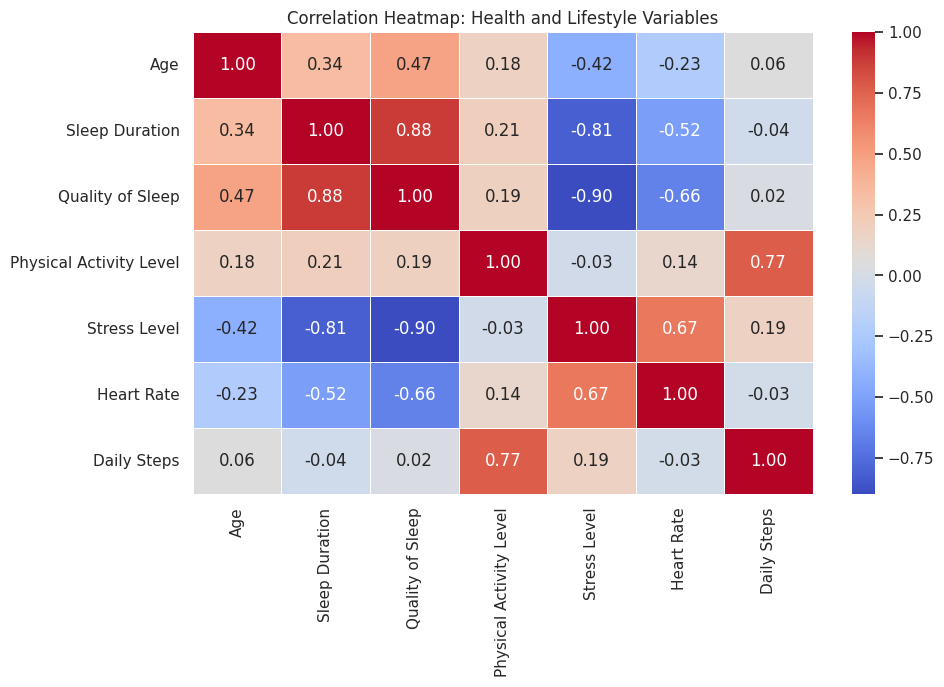

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant continuous/ordinal columns
correlation_cols = [
    'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
    'Stress Level', 'Heart Rate', 'Daily Steps'
]

# Compute correlation matrix (Pearson by default)
corr_matrix = df[correlation_cols].corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Health and Lifestyle Variables")
plt.show()


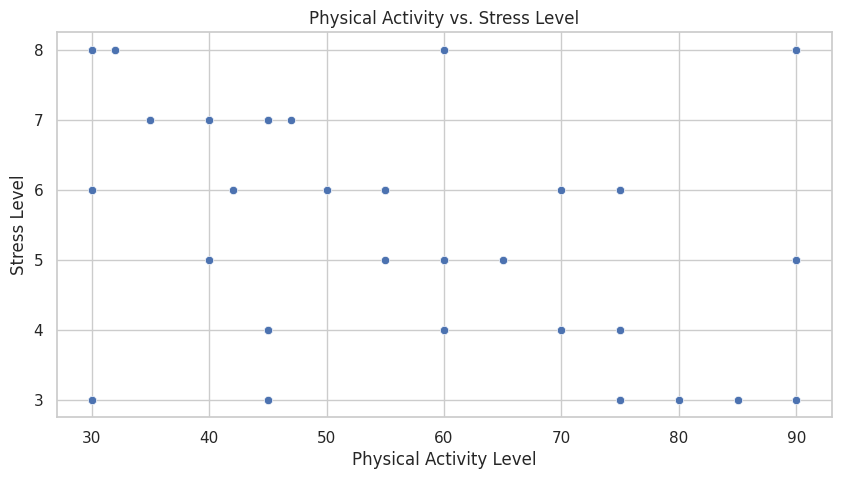

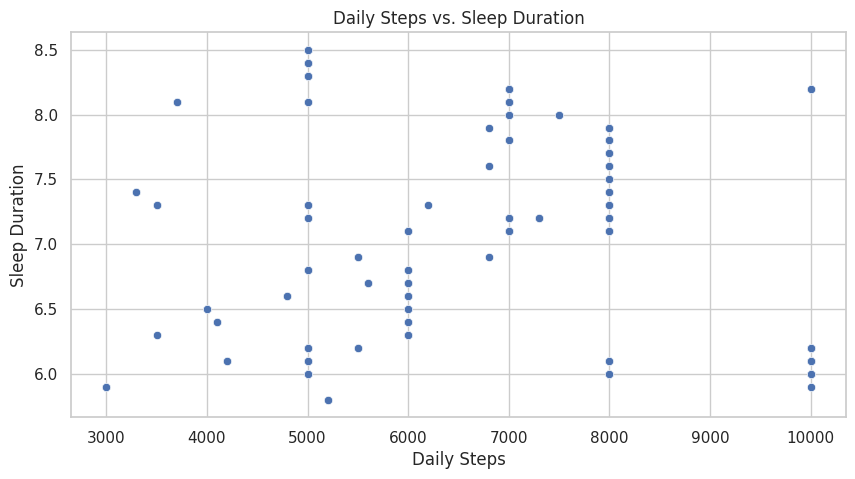

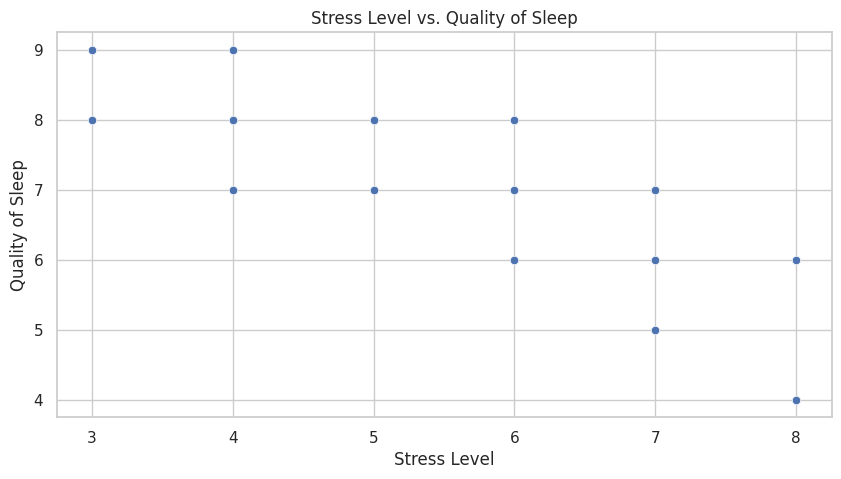

In [15]:
# Scatterplot 1: Physical Activity vs. Stress Level
sns.scatterplot(data=df, x='Physical Activity Level', y='Stress Level')
plt.title("Physical Activity vs. Stress Level")
plt.show()

# Scatterplot 2: Daily Steps vs. Sleep Duration
sns.scatterplot(data=df, x='Daily Steps', y='Sleep Duration')
plt.title("Daily Steps vs. Sleep Duration")
plt.show()

# Scatterplot 3: Stress Level vs. Quality of Sleep
sns.scatterplot(data=df, x='Stress Level', y='Quality of Sleep')
plt.title("Stress Level vs. Quality of Sleep")
plt.show()


### Correlation Heatmap: Health and Lifestyle Variables

The correlation heatmap below displays Pearson correlation coefficients between continuous health and lifestyle variables. Each value ranges from -1 to 1:

- Values near 1 indicate a strong positive linear relationship.  
- Values near -1 indicate a strong negative linear relationship.  
- Values near 0 suggest little to no linear relationship.

Key insights from the heatmap:

Quality of Sleep and Sleep Duration (r = 0.88) show a very strong positive correlation.  
Stress Level and Quality of Sleep (r = -0.90) reveal a strong negative correlation, confirming that individuals with higher stress experience poorer sleep.  
Daily Steps and Physical Activity Level (r = 0.77) are positively correlated, as expected.  
Heart Rate and Stress Level (r = 0.67) suggest a moderate positive relationship — stress may elevate heart rate.

This heatmap allows us to visually confirm patterns also reflected in our hypothesis testing and other correlation methods.


### IV. Interpretation and Real-World Application

This analysis of the Sleep Health and Lifestyle dataset reveals several meaningful relationships between lifestyle behaviors and health outcomes.

#### Factors Influencing Health Outcomes

The most consistent and statistically significant factors influencing health in this dataset were stress level, sleep quality, and BMI category.

Individuals with a diagnosed sleep disorder had significantly lower sleep duration than those without a disorder, confirming the direct impact of sleep-related conditions on health behaviors.  
Stress level was strongly and negatively correlated with sleep quality and sleep duration. High stress was also moderately associated with elevated heart rate, reinforcing the connection between psychological stress and physiological strain.  
BMI category was significantly associated with stress level, suggesting that individuals classified as overweight or obese experience higher average stress.

#### Insights on Physical Activity and Heart Health

While we expected physical activity to be closely linked with improved health outcomes:

The correlation between physical activity level and stress level was weak and not statistically significant.  
Similarly, daily step count did not show strong associations with sleep duration or BMI status, indicating that activity alone may not be a reliable predictor of health outcomes without considering diet, environment, or other behaviors.  
However, heart rate was moderately correlated with stress, and weakly (negatively) with age, aligning with clinical expectations that stress elevates heart rate while heart rate typically declines slightly with age.

#### Implications for Health Policy and Lifestyle Recommendations

Based on these findings, several actionable recommendations emerge:

Stress management interventions may improve both sleep quality and cardiovascular health, given their strong associations.  
Sleep health screening, including identification of sleep disorders, could lead to early interventions that enhance daily functioning and reduce health risks.  
While exercise alone did not significantly correlate with stress in this dataset, a multi-dimensional wellness approach (sleep, stress reduction, and consistent activity) is still supported by public health guidelines.  
Targeted support for individuals with higher BMI may need to include mental health and stress-reduction components, not just physical fitness plans.

#### Final Insight

This dataset shows that psychological health (stress) and sleep behavior are more predictive of other health outcomes than physical activity alone.  
Effective health policies and personal routines should address not only physical fitness, but also mental well-being and sleep quality to achieve long-term wellness.


# Final Data Science Project  
### Exploring Factors Influencing Health and Lifestyle  

Course: DS204 – Applied Data Science  
Student: Basit Shah  
Date: May 29, 2025  

---

## Introduction

In today’s health-focused world, understanding the lifestyle factors that influence individual well-being is more important than ever. This project investigates how stress, sleep, physical activity, and demographic attributes contribute to overall health outcomes. Through a structured analysis using statistical techniques, the goal is to uncover meaningful insights that can inform both personal health decisions and public health recommendations.

---

## Dataset Overview

The dataset used in this project is the "Sleep Health and Lifestyle Dataset," obtained from Kaggle. It contains anonymized health records of individuals, including:

- Demographics: Age, Gender, Occupation  
- Lifestyle: Sleep Duration, Physical Activity, Daily Steps  
- Health Metrics: Stress Level, BMI Category, Heart Rate, Sleep Disorder Status

---

## Research Questions

1. Do people with sleep disorders sleep significantly less than those without?  
2. Is there a relationship between physical activity and stress level?  
3. Does BMI influence stress or sleep quality?  
4. What variables are correlated with heart rate or sleep duration?  
5. How do multiple health behaviors interact across categories like gender or BMI?

---

## Methodology

This study followed a structured data science workflow:

- Exploratory Data Analysis (EDA): Identified patterns and outliers using descriptive statistics and visualizations  
- Hypothesis Testing: Performed independent t-tests and ANOVA to evaluate group differences  
- Correlation Testing: Used Pearson, Spearman, Kendall’s Tau, Point-Biserial, and Phi coefficient to explore relationships between numeric and categorical variables  
- Visualization: Created heatmaps, scatterplots, and boxplots to reveal trends and confirm statistical relationships

---

## Exploratory Data Analysis (EDA)

We summarized key metrics like age, heart rate, physical activity, sleep duration, and stress level.

| Variable                 | Mean    | Median | Std Dev |
|--------------------------|---------|--------|---------|
| Age                      | 42.18   | 43.0   | 8.67    |
| Sleep Duration           | 7.13    | 7.2    | 0.80    |
| Quality of Sleep         | 7.31    | 7.0    | 1.20    |
| Physical Activity Level  | 59.17   | 60.0   | 20.83   |
| Stress Level             | 5.39    | 5.0    | 1.77    |
| Heart Rate               | 70.17   | 70.0   | 4.14    |
| Daily Steps              | 6816.84 | 7000.0 | 1617.92 |

Visualizations (histograms and boxplots) showed relatively normal distributions for continuous variables, though stress and heart rate had some variability.

---

## Hypothesis Testing

### Hypothesis 1: Sleep Disorders and Sleep Duration  
Mean Duration (No Disorder): 7.36 hrs  
Mean Duration (Disorder): 6.81 hrs  
t-statistic = 6.876, p-value = 0.0000  
Conclusion: People with sleep disorders sleep significantly less. (Reject null)

### Hypothesis 2: Physical Activity vs. Stress  
Stress (Low Activity): 5.41  
Stress (High Activity): 5.34  
t-statistic = 0.361, p-value = 0.7181  
Conclusion: No significant difference in stress based on activity. (Fail to reject null)

### ANOVA: Stress by BMI Category  
F-statistic = 5.007, p-value = 0.0072  
Conclusion: Stress level significantly differs by BMI group. (Reject null)

---

## Correlation Analysis

Pearson: Age vs. Heart Rate → r = -0.226, p = 0.0000  
Spearman: Physical Activity vs. Sleep Quality → ρ = 0.178, p = 0.0005  
Kendall’s Tau: Stress vs. Sleep Quality → τ = -0.826, p = 0.0000  
Point-Biserial: Healthy BMI vs. Daily Steps → r_pb = 0.045, p = 0.3809  
Phi Coefficient: Gender vs. Sleep Disorder → φ = 0.280, p = 0.0000  

---

## Visualizations Summary

Heatmap: Revealed strong correlations between sleep duration, quality, and stress  
Scatterplots: Confirmed that increased stress correlates with decreased sleep quality and duration  
Boxplots: Visualized differences in stress across BMI groups  
These visuals reinforced statistical findings and offered intuitive insight into trends

---

## Real-World Applications and Recommendations

This study found that:

- Stress management is critical for improving sleep and heart health  
- Sleep disorders significantly impact sleep duration and overall well-being  
- BMI influences psychological stress and should be addressed with holistic interventions  
- While physical activity had a weaker correlation with outcomes in this dataset, combined strategies (exercise, stress reduction, healthy sleep) remain essential

These findings support health policy focused on mental health screening, sleep therapy access, and education on stress-sleep relationships

---

## Conclusion

This project successfully applied data science methods to explore the relationships between health indicators and lifestyle factors  
Stress, sleep quality, and BMI were the most predictive of other outcomes  
Though some behaviors (like exercise) showed weaker statistical links, the holistic view reinforces the need for integrated wellness strategies  
Future research should consider time-series health tracking, more diverse populations, and clinical measurements like cholesterol for deeper insight
